In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy as sp
import time

In [2]:
#standard deviation and mean for the radius
sigma_r = 0.2
mu_r = 11.8
#standard deviation and mean for the mass
sigma_m = 0.2
mu_m = 1.4 

In [3]:
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

In [4]:
#each random point is an array of 3 elements, the x position, the y position, and the probability
num_rand_points = 100000
rand_points = np.zeros((num_rand_points, 3))

In [5]:
#for each point, assign an x and y value within the bounds of .uniform
#then calculate the probability using two 2D gaussian bumps 
#one 2D gaussian bump is two gaussians multiplied and the two pairs of gaussian functions are summed to get the final probability
for i in range(num_rand_points):
    rand_points[i][0] = random.uniform(8, 16)
    rand_points[i][1] = random.uniform(0, 3)
    rand_points[i][2] = gaussian(rand_points[i][0], mu_r, sigma_r) * gaussian(rand_points[i][1], mu_m, sigma_m) + \
    gaussian(rand_points[i][0], 12.5, 0.1) * gaussian(rand_points[i][1], 0.6, 0.2)

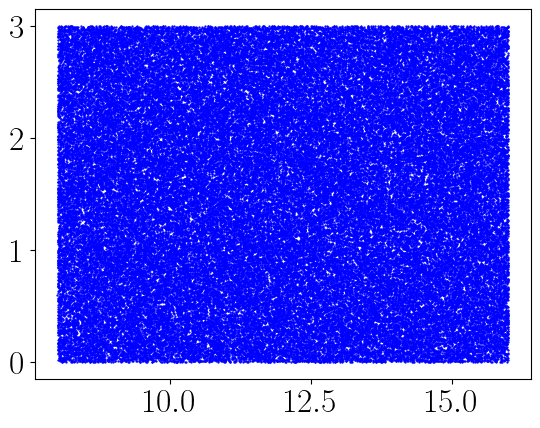

In [6]:
#plot of all the random pointns
plt.scatter(rand_points[:, 0], rand_points[:, 1], s=0.4, color='blue')

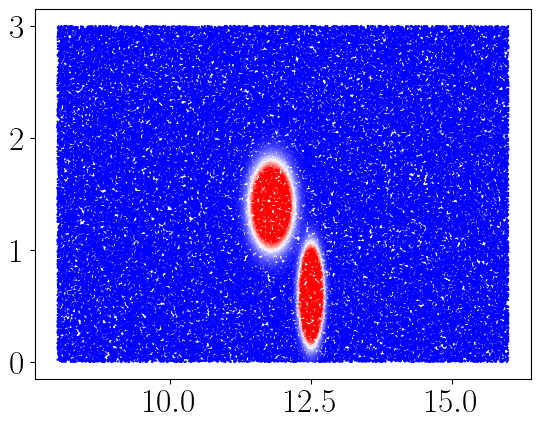

In [7]:
#same plot as above except more probable points are colored red
cmap = mp.colors.LinearSegmentedColormap.from_list("blue_white_red", ["blue", "white","red"])
plt.scatter(rand_points[:, 0], rand_points[:, 1], s=0.4, color = cmap(rand_points[:,2]))

In [8]:
#setting up evenly spaced points for the KDE
X = np.linspace(8, 16, 250)
Y = np.linspace(0, 3, 250)
points = np.zeros((250*250, 2))
for i in range(250):
    for j in range(250):
        points[i+j*250] = [X[i], Y[j]]

In [9]:
#the PDF of the likelihood is found using the KDE (.gaussian_kde)
start = time.time()
pdf = sp.stats.gaussian_kde((rand_points[:,0], rand_points[:,1]), weights=rand_points[:,2], bw_method=1)
prob = np.zeros(250*250)
#every point is evaluated using the PDF function
for i in range(250):
    for j in range(250):
        prob[i+j*250] = pdf.evaluate((X[i], Y[j]))
end = time.time()
print(str((end-start)/60) + " minutes")

2.16413228114446 minutes


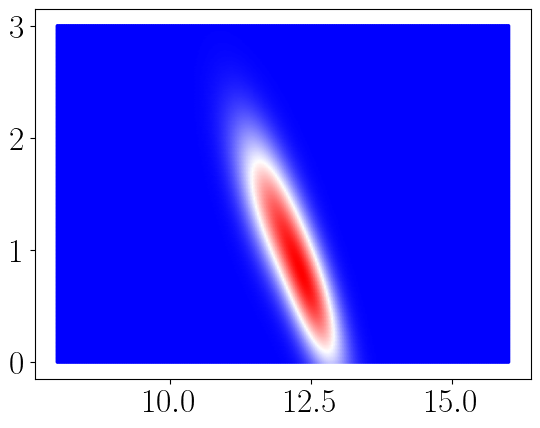

In [10]:
#normalize the probabilities so the highest is always the same shade of red
norm = plt.Normalize(prob.min(), prob.max())
plt.scatter(points[:,0], points[:,1], color=cmap(norm(prob)), s=3)

In [11]:
#exactly the same as two cells ago but the bandwidth is 0.5 instead of 1
start2 = time.time()
pdf2 = sp.stats.gaussian_kde((rand_points[:,0], rand_points[:,1]), weights=rand_points[:,2], bw_method = 0.5)
prob2 = np.zeros(250*250)
for i in range(250):
    for j in range(250):
        prob2[i+j*250] = pdf2.evaluate((X[i], Y[j]))
end2 = time.time()
print(str((end2-start2)/60) + " minutes")

5.386805856227875 minutes


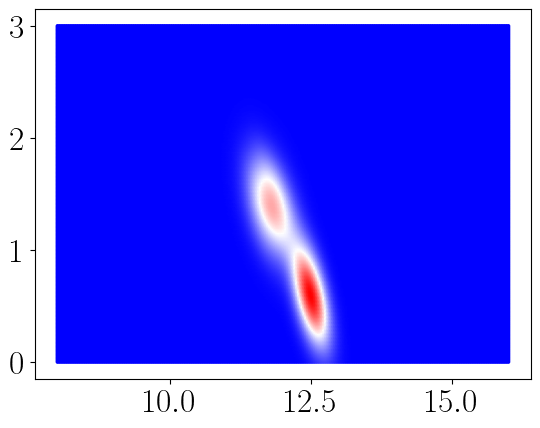

In [12]:
norm2 = plt.Normalize(prob2.min(), prob2.max())
plt.scatter(points[:,0], points[:,1], color=cmap(norm2(prob2)), s=3)